# DATE A SCIENTIST

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.
In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, which we have imported for you with the line:

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("profiles.csv")

                                          Inspect the data

Let's make sure we understand what these columns represent!
Pick some columns and call `.head()` on them to see the first five rows of data. For example, we were curious about `job`, so we called:

In [50]:
print(df.columns)
print(df.job.head())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object


In [51]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

                                   Visualize some of the Data

For example, we were curious about the distribution of ages on the site, so we made a histogram of the `age` column:

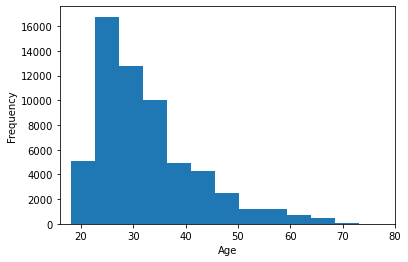

In [52]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

what about religion and income distribution on the site

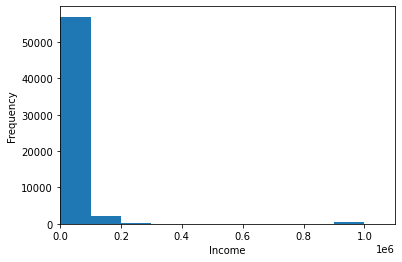

In [53]:
plt.hist(df.income, bins=10)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(-1, 1100000)
plt.show()

we can see that a few most of the income distribution is limited to not greater than 200000. lets zoom into that area

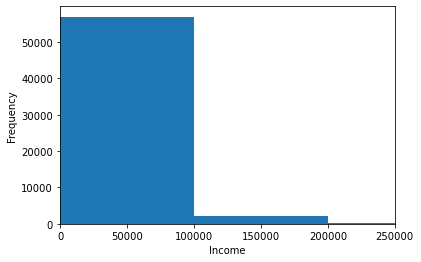

In [54]:
plt.hist(df.income, bins=10)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(-1, 250000)
plt.show()

                                                 Formulate a Question

As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:
```
df.sign.value_counts()
```
We started to wonder if there was a way to predict a user's Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.

In [55]:
df.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

                                              Augment your Data

In order to answer the question you've formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).

Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.

For our question about Zodiac signs, we wanted to transform the `drinks` column into numerical data. We use:


In [56]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}

df["drinks_code"] = df.drinks.map(drink_mapping)


#We do same for `smokes` and `drugs`
smoke_mapping = {"no": 0, "trying to quit": 1, "sometimes": 2, "when drinking": 3, "yes": 4}
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["smokes_code"] = df.smokes.map(smoke_mapping)
df["drugs_code"] = df.drugs.map(drugs_mapping)

We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the `NaN`s, and then created a new column called `essay_len`

In [57]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


df["essay_len"] = all_essays.apply(lambda x: len(x))


verify if the edits worked

In [58]:
print(df.drinks_code.unique())
print(df.smokes_code.unique())
print(df.drugs_code.unique())
print(df.essay_len.unique())

[ 2.  3.  0.  1. nan  4.  5.]
[ 2.  0. nan  3.  4.  1.]
[ 0.  1. nan  2.]
[ 2644  1453  5517 ... 19541  4567  6263]


lets take care of the null values

In [59]:
df.fillna({'drinks_code':6,
           'smokes_code':5,
           'drugs_code':3},
          inplace=True)

# df.fillna({'drinks_code':-1,
#            'smokes_code':-1,
#            'drugs_code':-1},
#           inplace=True)

df.isna().any()


#df=df.dropna(0,how="any")

#print(len(df))

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
orientation    False
pets            True
religion        True
sex            False
sign            True
smokes          True
speaks          True
status         False
drinks_code    False
smokes_code    False
drugs_code     False
essay_len      False
dtype: bool

As we can see our features have been rid of null nalues

                                       Normalize your Data!

In order to get accurate results, we should make sure our numerical data all has the same weight.
For our Zodiac features, we use:

In [46]:
from sklearn import preprocessing

feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len']]

x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)



                                     Use Classification Techniques

We have learned how to perform classification in a few different ways.


- We learned about K-Nearest Neighbors by exploring IMDB ratings of popular movies 
- We learned about Support Vector Machines by exploring baseball statistics
- We learned about Naive Bayes by exploring Amazon Reviews


Some questions we used classification to tackle were:


- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?

In [47]:
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split

labels1=df.sex
labels2=df.education

train_data, val_data, train_labels, val_labels=train_test_split (feature_data,labels1,test_size=0.2,random_state =100)

classifier=KNeighborsClassifier(n_neighbors = 3)
classifier.fit(train_data,train_labels)
print(classifier.score(val_data,val_labels))
k_and_score=[]
for k in range(1,101):
  classifier=KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_data,train_labels)
  k_and_score.append([k,classifier.score(val_data,val_labels)])
best_k=[item for item in k_and_score if max(k_and_score[1]==item[1])]
print(best_k)

0.5390325271059216
[[2, 0.48407005838198497]]


The results doesnt look encouraging and it shows we cant predict sex effectively with above features

Can we predict sex with education level and income? lets try it out. But before that lets check educatio